In [1]:
#data loading
import pandas as pd
filename="/content/SLID.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames  wages  education  age     sex language
0            1  10.56       15.0   40    Male  English
1            2  11.00       13.2   19    Male  English
2            3    NaN       16.0   49    Male    Other
3            4  17.76       14.0   46    Male    Other
4            5    NaN        8.0   71    Male  English
...        ...    ...        ...  ...     ...      ...
7420      7421    NaN        8.0   73    Male    Other
7421      7422  30.49       16.0   52    Male    Other
7422      7423  22.00       15.0   41    Male    Other
7423      7424  11.85       11.0   47  Female  English
7424      7425  23.00       14.0   30    Male  English

[7425 rows x 6 columns]


In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
wages,3278
education,249
age,0
sex,0
language,121


In [3]:
#Fill null values
a[a.columns[5]]=a[a.columns[5]].fillna("0")

intColumns={1,2}
for y in intColumns:
    a[a.columns[y]]=a[a.columns[y]].fillna(0)

In [6]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="wages"

#transform string into int
transformColumns={4,5}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  wages  education  age  sex  language
0            1    418         87   24    1         1
1            2    445         69    3    1         1
2            3      0         97   33    1         3
3            4    909         77   30    1         3
4            5      0         21   55    1         1
...        ...    ...        ...  ...  ...       ...
7420      7421      0         21   57    1         3
7421      7422   1434         97   36    1         3
7422      7423   1142         87   25    1         3
7423      7424    495         47   31    0         1
7424      7425   1187         77   14    1         1

[7425 rows x 6 columns]


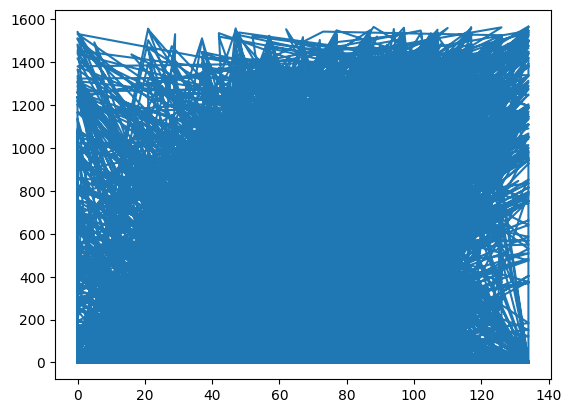

In [7]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 7425 artists>

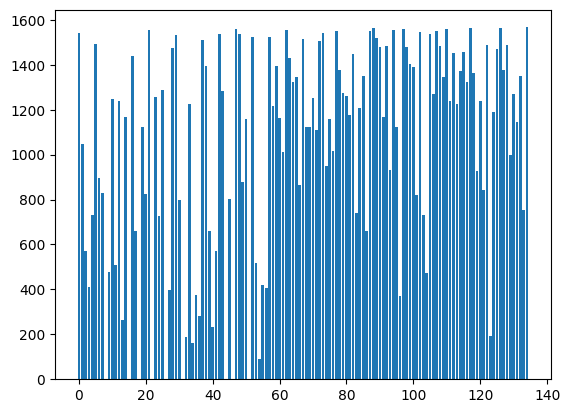

In [8]:
plt.bar(a[a.columns[2]],a[str(target)])

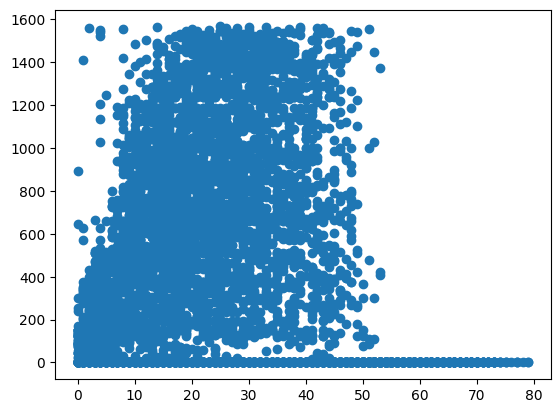

In [9]:
plt.scatter(a[a.columns[3]], a[str(target)])

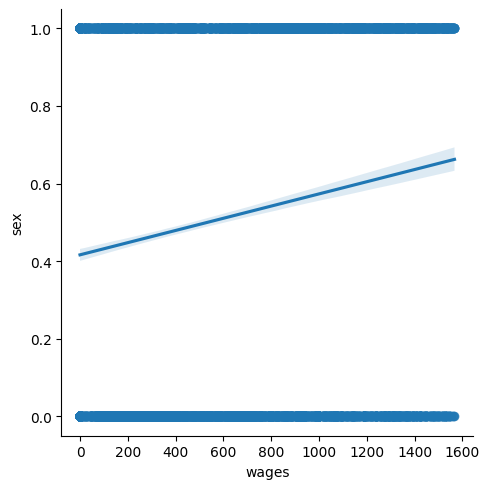

In [11]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="wages",y="sex",data=a)

<Axes: xlabel='sex', ylabel='wages'>

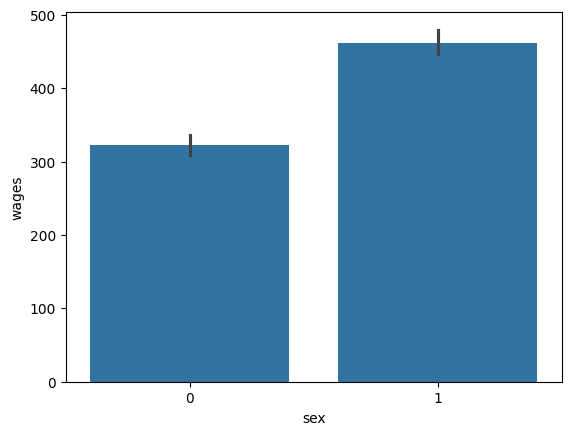

In [12]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='education', ylabel='wages'>

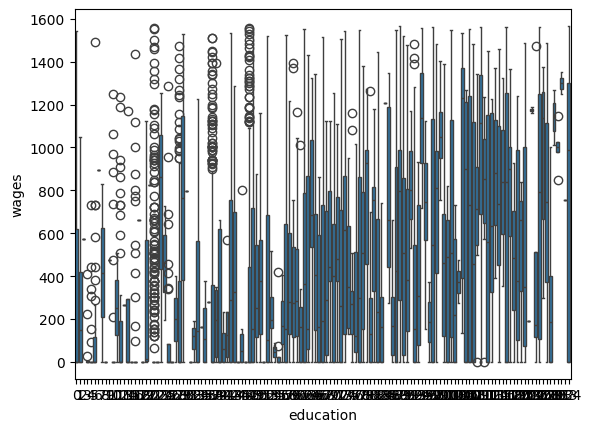

In [13]:
sns.boxplot(x=a.columns[2],y=str(target),data=a)

<ipython-input-14-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='wages', ylabel='Density'>

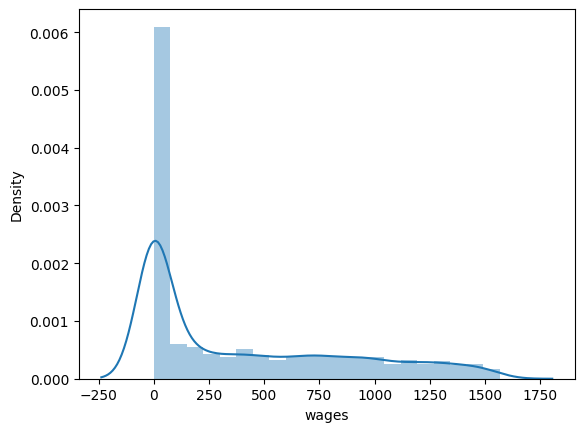

In [14]:
sns.distplot(a[str(target)])

<Axes: xlabel='age', ylabel='Density'>

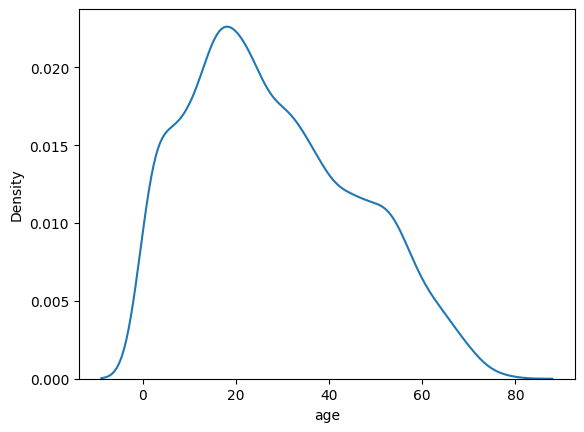

In [15]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='education', ylabel='count'>

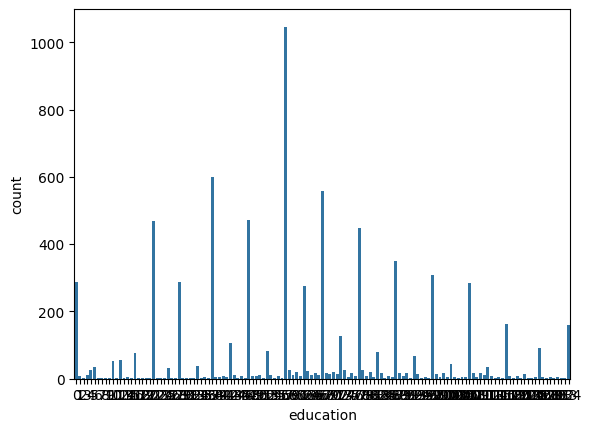

In [16]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

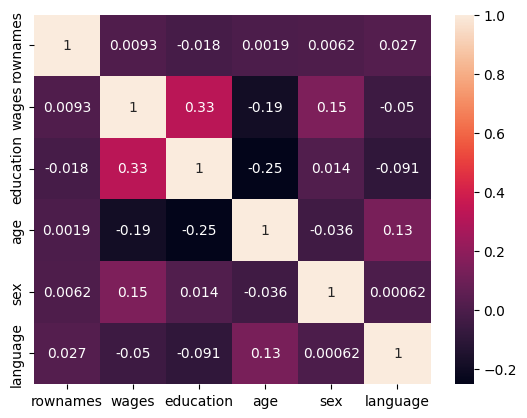

In [17]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

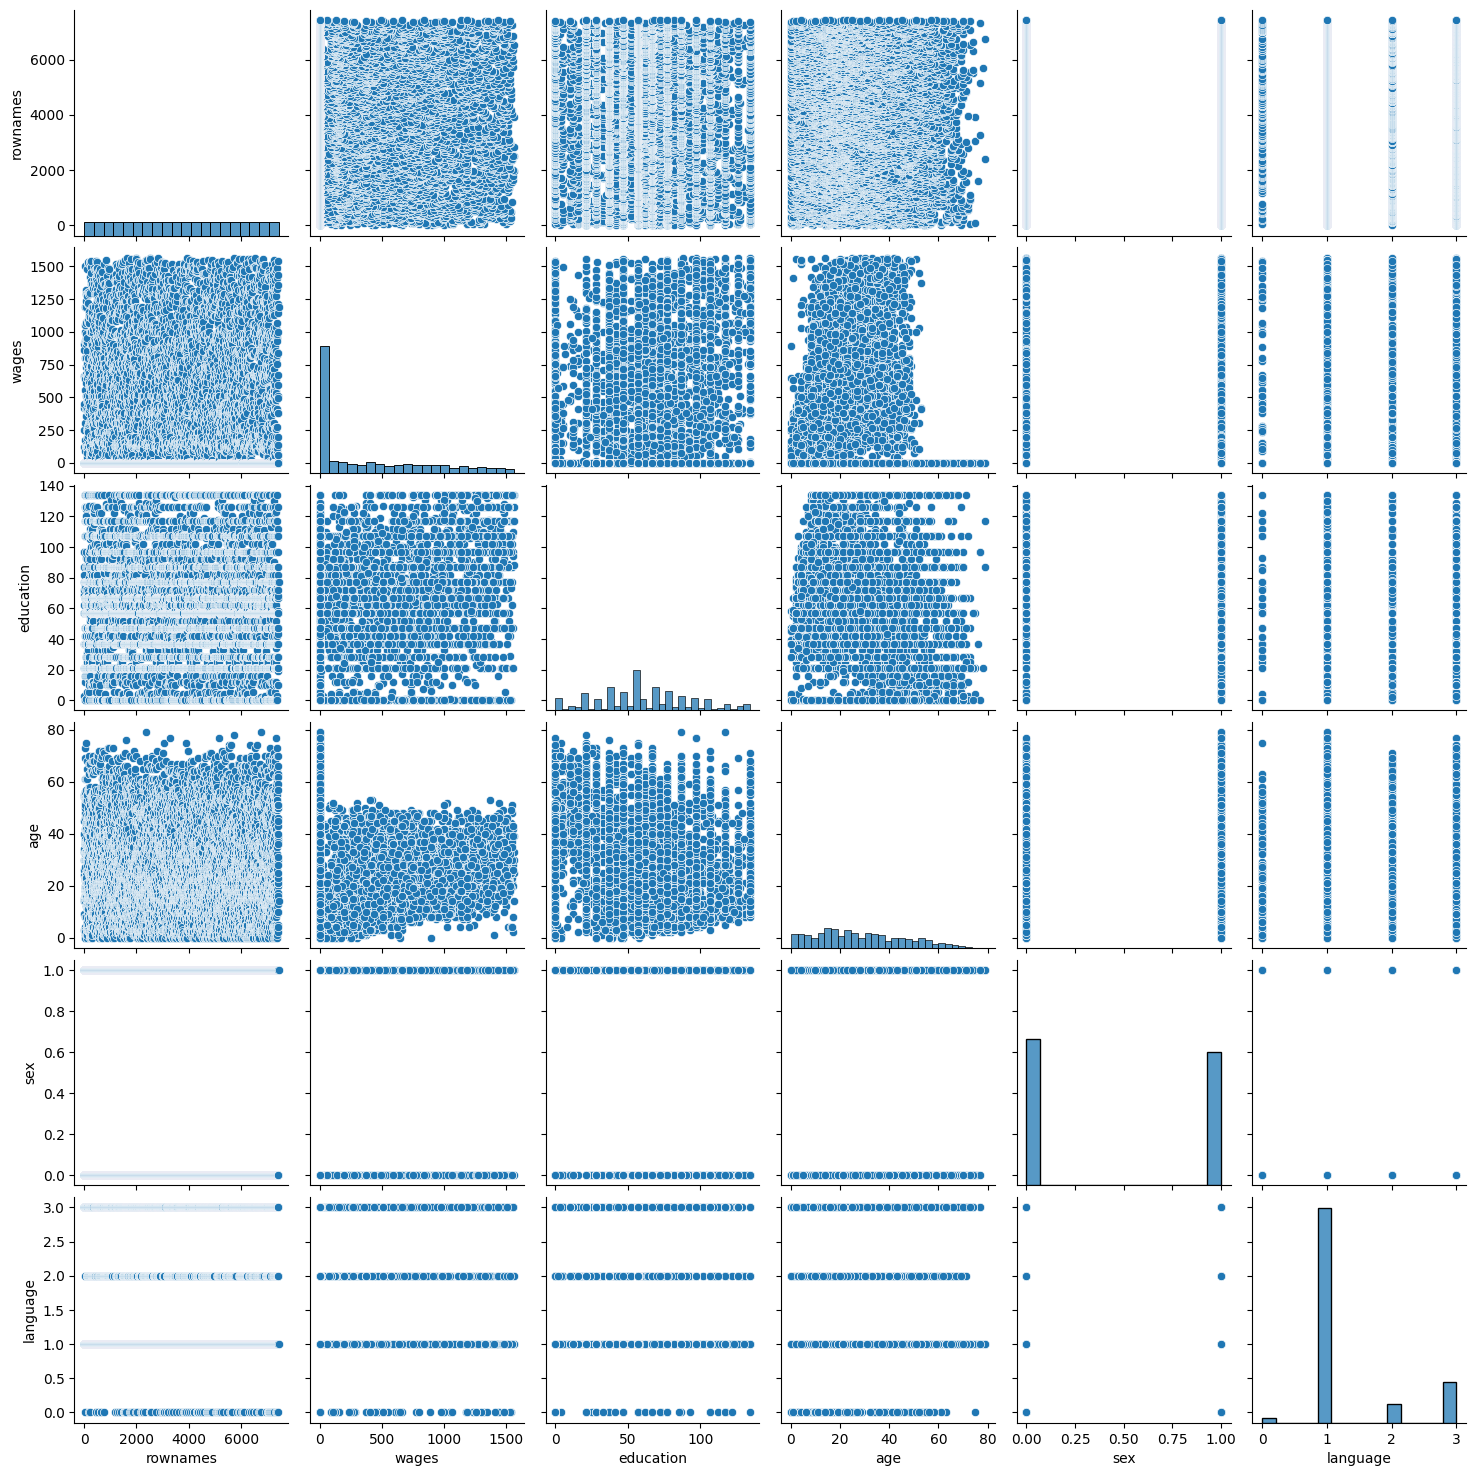

In [18]:
sns.pairplot(data=a)

In [19]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  education  age  sex  language
0            1         87   24    1         1
1            2         69    3    1         1
2            3         97   33    1         3
3            4         77   30    1         3
4            5         21   55    1         1
...        ...        ...  ...  ...       ...
7420      7421         21   57    1         3
7421      7422         97   36    1         3
7422      7423         87   25    1         3
7423      7424         47   31    0         1
7424      7425         77   14    1         1

[7425 rows x 5 columns]


In [20]:
print(y)

0        418
1        445
2          0
3        909
4          0
        ... 
7420       0
7421    1434
7422    1142
7423     495
7424    1187
Name: wages, Length: 7425, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
print(x_train)

      rownames  education  age  sex  language
1432      1433         57   22    1         1
6953      6954        102   32    0         1
5191      5192         21   56    0         3
4246      4247         47   48    1         1
4584      4585         77   40    0         1
...        ...        ...  ...  ...       ...
898        899         21   52    0         1
5386      5387         42   26    0         1
4231      4232          0    7    0         1
2155      2156         72   14    1         3
1130      1131         72   10    1         1

[5940 rows x 5 columns]


In [23]:
print(y_train)

1432       0
6953     380
5191       0
4246       0
4584    1438
        ... 
898        0
5386     605
4231     447
2155    1294
1130       0
Name: wages, Length: 5940, dtype: int64


In [24]:
print(x_test)

      rownames  education  age  sex  language
3904      3905         57   75    0         1
3674      3675        107   21    1         1
2041      2042         47    7    0         1
2076      2077         87    2    0         3
897        898         52   69    0         1
...        ...        ...  ...  ...       ...
1886      1887         72   18    1         1
2205      2206         67    2    1         1
874        875         62   35    0         1
494        495         67    6    1         1
864        865        126   25    0         1

[1485 rows x 5 columns]


In [25]:
print(y_test)

3904       0
3674    1009
2041       0
2076     152
897        0
        ... 
1886     754
2205     244
874        0
494        0
864      643
Name: wages, Length: 1485, dtype: int64


In [26]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [ ]:
print(ypred)

[-0.00456452  1.4560579   0.09316159 ...  0.14098543  1.68583546
  1.78619869]


In [28]:
print(model.predict([[3905,57,75,0,1]]))

[179.19298164]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [30]:
print(ypred)

[  0.   0. 112. ...   0.   0.   0.]


In [31]:
print(model.predict([[3905,57,75,0,1]]))

[179.19298164]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [33]:
print(ypred)

[   0.   1086.08  282.52 ...  504.38  223.34  513.54]


In [34]:
print(model.predict([[3905,57,75,0,1]]))

[179.19298164]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
